#Deep learning with multiple outputs

analyse sales data from more than 16.500 games

source : kaggle https://www.kaggle.com/datasets/gregorut/videogamesales

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
import seaborn as sns


In [11]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

import keras
print("Keras version:", keras.__version__)

TensorFlow version: 2.17.0
Keras version: 3.4.1


In [12]:
# get date from kagle
!kaggle datasets download -d gregorut/videogamesales

# unzip and load dataset in pandas
!unzip videogamesales.zip

Dataset URL: https://www.kaggle.com/datasets/gregorut/videogamesales
License(s): unknown
  0% 0.00/381k [00:00<?, ?B/s]
100% 381k/381k [00:00<00:00, 103MB/s]


In [67]:
df = pd.read_csv('/content/vgsales.csv')

In [68]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [70]:
columns = ['Other_Sales','Global_Sales']
df = df.drop(columns, axis=1)

In [71]:
df.shape

(16598, 9)

In [72]:
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0


In [73]:
# drop nulls

df = df.dropna()
df.shape


(16291, 9)

In [74]:
# unique Names
df['Name'].value_counts()

,count
Name,
Need for Speed: Most Wanted,12
FIFA 14,9
Ratatouille,9
LEGO Marvel Super Heroes,9
Cars,8
...,...
PGA Tour 96,1
Game & Wario,1
Angry Birds,1


In [75]:
df = df.drop('Name', axis = 1)
df

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales
0,1,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77
1,2,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81
2,3,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79
3,4,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28
4,5,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22
...,...,...,...,...,...,...,...,...
16593,16596,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00
16594,16597,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00
16595,16598,PS2,2008.0,Racing,Activision,0.00,0.00,0.00
16596,16599,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00


In [82]:
df['Platform'].value_counts()

,count
Platform,
DS,2131
PS2,2127
PS3,1304
Wii,1290
X360,1234
PSP,1197
PS,1189
PC,938
XB,803


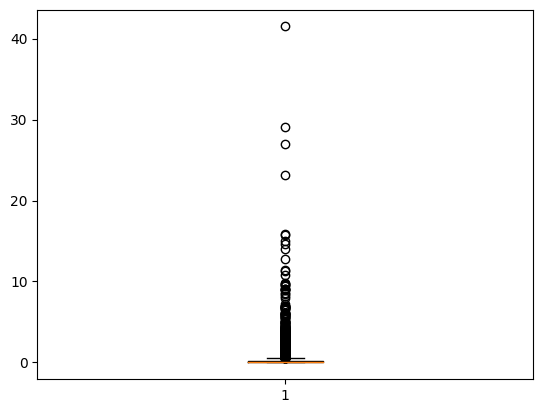

In [76]:
plt.boxplot(df['NA_Sales'])
plt.show()

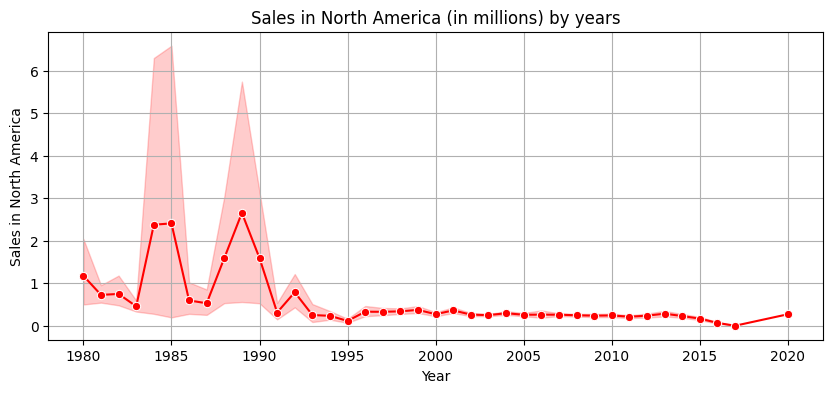

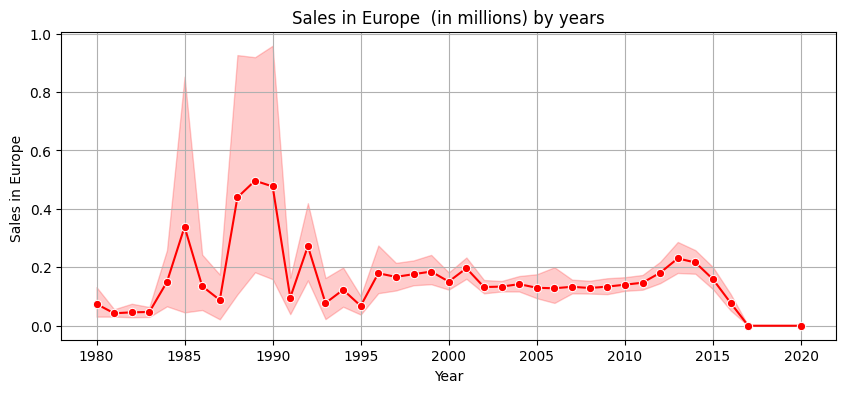

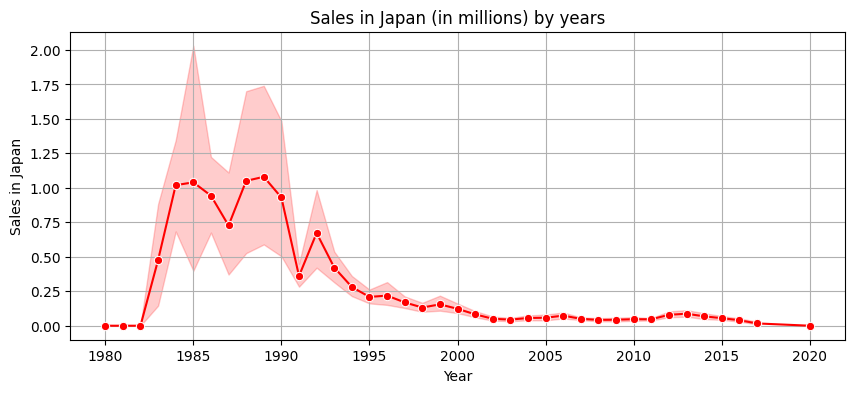

In [78]:
columns = ['NA_Sales','EU_Sales','JP_Sales']
columnsName = ['North America','Europe ','Japan']
for column, name in zip(columns, columnsName):
  plt.figure(figsize=(10, 4))
  sns.lineplot(df , x = "Year" , y = column , color = 'red' , marker='o')
  plt.title(f'Sales in {name} (in millions) by years')
  plt.xlabel('Year')
  plt.ylabel(f'Sales in {name}')
  plt.grid(True)
  plt.show()

In [108]:
# check sales 0
print(df[df.NA_Sales == 0].shape)
print(df[df.EU_Sales == 0].shape)
print(df[df.JP_Sales == 0].shape)
df.drop(df[df.NA_Sales == 0].index, inplace = True)
df.drop(df[df.EU_Sales == 0].index, inplace = True)
df.drop(df[df.JP_Sales == 0].index, inplace = True)
df.shape

(4430, 8)
(5624, 8)
(10207, 8)


(2426, 8)

In [109]:
df.iloc[:,[0,1,2,3,4]]

,Rank,Platform,Year,Genre,Publisher
0,1,Wii,2006.0,Sports,Nintendo
1,2,NES,1985.0,Platform,Nintendo
2,3,Wii,2008.0,Racing,Nintendo
3,4,Wii,2009.0,Sports,Nintendo
4,5,GB,1996.0,Role-Playing,Nintendo
...,...,...,...,...,...
13109,13111,PS2,2006.0,Racing,Sega
13240,13242,PS2,2007.0,Strategy,Tecmo Koei
13281,13283,PSP,2007.0,Sports,Namco Bandai Games
13335,13337,Wii,2006.0,Simulation,Konami Digital Entertainment


In [110]:
df.iloc[:,[5,6,7]]

,NA_Sales,EU_Sales,JP_Sales
0,41.49,29.02,3.77
1,29.08,3.58,6.81
2,15.85,12.88,3.79
3,15.75,11.01,3.28
4,11.27,8.89,10.22
...,...,...,...
13109,0.02,0.01,0.01
13240,0.01,0.01,0.03
13281,0.01,0.01,0.01
13335,0.03,0.01,0.01


In [111]:
X = df.iloc[:,[0,1,2,3,4]].values
# T transposes the array, allowing you to unpack the columns
y_na, y_eu, y_jp = df.iloc[:, 5:8].values.T

In [112]:
X

array([[1, 'Wii', 2006.0, 'Sports', 'Nintendo'],
       [2, 'NES', 1985.0, 'Platform', 'Nintendo'],
       [3, 'Wii', 2008.0, 'Racing', 'Nintendo'],
       ...,
       [13283, 'PSP', 2007.0, 'Sports', 'Namco Bandai Games'],
       [13337, 'Wii', 2006.0, 'Simulation',
        'Konami Digital Entertainment'],
       [14304, '3DS', 2016.0, 'Action', 'Nintendo']], dtype=object)

In [113]:
y_na

array([4.149e+01, 2.908e+01, 1.585e+01, ..., 1.000e-02, 3.000e-02,
       2.000e-02])

In [114]:
## transformation  one hot enconde
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

df_subset = df[['Platform', 'Genre', 'Publisher']]
column_indices = [df.columns.get_loc(col) for col in df_subset.columns]
OneHotEncoder = ColumnTransformer(transformers=[('Onehot', OneHotEncoder(),
                                       column_indices)],
                        remainder='passthrough')
X = OneHotEncoder.fit_transform(X).toarray()
X.shape

(2426, 147)

In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model

input_layer_game = Input(shape = (147,))
dense_layer_1 = Dense(74, activation = 'relu')(input_layer_game)
dense_layer_2 = Dense(74, activation = 'relu')(dense_layer_1)
output_layer1 = Dense(1, activation = 'linear')(dense_layer_2)
output_layer2 = Dense(1, activation = 'linear')(dense_layer_2)
output_layer3 = Dense(1, activation = 'linear')(dense_layer_2)

regressor = Model(inputs = input_layer_game, outputs = [output_layer1, output_layer2, output_layer3])

In [125]:
regressor.compile(optimizer = 'adam', loss = 'mse')

In [126]:
# training
regressor.fit(X, [y_na, y_eu, y_jp], epochs = 500, batch_size = 100)

Epoch 1/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 60378.1055
Epoch 2/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1881.4479
Epoch 3/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 240.0417
Epoch 4/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 76.7077
Epoch 5/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 34.9637
Epoch 6/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26.5253
Epoch 7/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.1451
Epoch 8/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.0264
Epoch 9/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.6815
Epoch 10/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.2054
Epoch 11/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.2073
Epoch 12/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.9117
Epoch 13/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.6903
Epoch 14/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.5427
Epoch 15/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

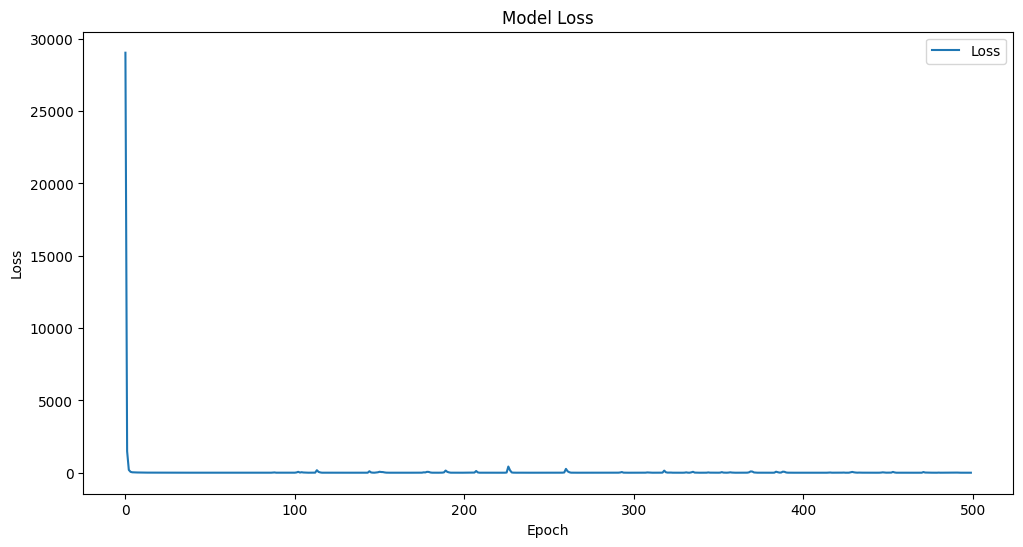

In [128]:
plt.figure(figsize=(12, 6))
plt.plot(regressor.history.history['loss'], label='Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()